#HW #1. Improve code Efficiency: Sort First!
**Benton Pelczynski**

## Scenario.

In a two class, classification problem, it is common to use a classifier that outputs confidences (rather than simply class labels). A good example of this is a Support Vector Machine. A pro for using such a classifier is that you gain more information -- specifically the confidence in the classification result. A con is that in order to make a final classification decision, a threshold value must be determined. For example, if a threshold of 0.75 is chosen, the class label 1 would be assigned for confidences greater than 0.75 and for confidences less than 0.75 a class label of 0 would be assigned. However, this begs the question: how is the threshold chosen?

Many data scientists will choose a threshold based on the experimental results and/or operational constraints. In this code example, we assume that we have confidences and true labels for a large data set. To determine a good threshold we will compute the true positive rates (TPRs) and false positive rates (FPRs) at all relevant thresholds. The relevant thresholds are considered those that would change the TPRs and FPRs.

In the code below, a function is defined to compute the TPR and FPR at all relevant thresholds. However, the code is not very efficient and can be improved. (Note there are tips and hints found in the comments.)

Your task is the following:

## Question 1
**40 POINTS**  
Assess the time complexity of the method computeAllTPRs(...). Provide a line-by-line assessment in comments identifying the proportional number of steps (bounding notation is sufficient) per line: eg, O(1), O(log n), O(n), etc. Also, derive a time step function T(n) for the entire method (where n is the size of input true_label).

## Question 2
**30 POINTS**  
Implement a new function computeAllTPRs_improved(...) which performs the same task as computeAllTPRs but has a significantly reduced time complexity. Also provide a line-by-line assessment in comments identifying the proportional number of steps per line, and derive a time step function T(n) for the entire method (where n is the size of input true_label).

## Question 3
**30 POINTS**  
Compare the theoretical time complexities of both methods and predict which is more efficient. Next, test your prediction by timing both methods on sample inputs of varying sizes. Create a plot of inputSize vs runtime (as done in similar class examples).  

**NOTE: Do not include runtimes for graphing**

**TOTAL POINTS: 100**

---

In [51]:
import matplotlib.pyplot as plt
import random
from copy import deepcopy
from numpy import argmax

Answer Question #1 in the comments of the code chunk below.

In [41]:
def computeAllTPRs(true_label, confs):
        '''

        inputs:
         - true_label: list of labels, assumed to be 0 or 1 (a two class problem)
         - confs: list of confidences

        This method computes the True Positive Rate (TPRs) and FPRs for all relevant
        thresholds given true_label and confs. Relevant thresholds are considered
        all different values found in confs.
        '''

        # Define / initialize  variables: All O(1).
        sentinelValue = -1 # used to replace max value found thus far
        totalPositives = sum(true_label)
        totalNegatives = len(true_label) - totalPositives
        truePositives = 0
        falsePositives = 0
        # Hint: Consider Memory Management
        truePositiveRate = []
        falsePositiveRate = []

        #Hint: Although not explicitly clear, the loop structure below is an
            #embeded loop ie, O(n^2) ... do you see why??
        #Hint: If you sort the confidences first you can improve the iteration scheme.

        # Iterate over all relevant thresholds. Compute TPR and FPR for each and
        # append to truePositiveRate , falsePositiveRate lists.

        for i in range(len(confs)): # O(n) iterations
          maxVal = max(confs) # max must check every element, so its runtime is O(n)  
          argMax = argmax(confs) # argmax also iterates through confs, so its runtime is O(n)
          confs[argMax] = sentinelValue # O(1) runtime  
          if true_label[argMax]==1:  # O(1) runtime  
            truePositives += 1 # O(1) runtime  
          else:
            falsePositives += 1 # O(1) runtime  

          truePositiveRate.append(truePositives/totalPositives) #append's runtime is O(1) amortized
          falsePositiveRate.append(falsePositives/totalNegatives) #append's runtime is O(1) amortized
        
        # print statements added by myself to compare to and confirm accuracy of improved function
        #print(truePositiveRate) 
        #print(falsePositiveRate)

# T(n) = 7O(1) + O(n)(2O(n) + 5O(1)) = 2O(n^2) + 5O(n) + 7O(1) ~ O(n^2)


In [37]:
def testComputeAllTPRs(numSamples):

  confList = []
  labels = []
  maxVal = 10000
  random.seed(121) #set seed added by myself for reproducability
  for i in range(0,numSamples):
    n = random.randint(1,maxVal)
    confList.append(n/maxVal)
    if n/maxVal > .5:
      lab = 1
    else:
      lab = 0
    labels.append(lab)
  computeAllTPRs(labels, deepcopy(confList))  # Why a deepcopy here?

Below, provide your implementation for Question #2.

In [42]:
def TPR_merge_sort(true_label, confs):
    '''
    inputs:
    - true_label: list of labels to be sorted to match sorted confs
    - confs: list of confidences to be sorted

    Modified version of merge_sort for the function computeAllTPRs_improved,
    to sort confs and corresponding true_label.
    '''
    if len(confs) <= 1: # O(1) runtime
        return (true_label, confs) # O(1) runtime
    mid = len(confs) // 2 # O(1) runtime
    true_label_left, confs_left = TPR_merge_sort(true_label[:mid], confs[:mid]) 
    # As TPR_merge_sort is recursively called with list parameters of size n/2, this recursive call will occur O(logn) times
    true_label_right, confs_right = TPR_merge_sort(true_label[mid:], confs[mid:]) # O(logn); see above
    return TPR_merge(true_label_left, confs_left, true_label_right, confs_right) # merge sort's runtime is O(n);
                                                                                 # see TPR_merge function for stepwise assessment

    # T(n) = 2O(logn)(3O(1) + O(n)) = 2O(nlogn) + 6O(logn) ~ O(nlogn)

def TPR_merge(true_label_left, confs_left, true_label_right, confs_right):
    '''
    inputs:
    - true_label_left: list of labels to be merged alongside confs
    - confs_left: list of confidences to be merged
    - true_label_right: list of labels to be merged alongside confs
    - confs_right: list of confidences to be merged

    Modified version of merge for the function computeAllTPRs_improved,
    to sort confs and corresponding true_label.
    '''
    # All initializations have O(1) runtime
    sorted_true_label = []
    sorted_confs = []
    i = j = 0
    
    while i < len(confs_left) and j < len(confs_right): # O(n) iterations (number of elements in confs_left + confs_right)
        if confs_left[i] >= confs_right[j]: # O(1) runtime
            sorted_true_label.append(true_label_left[i]) # append's runtime is O(1) amortized
            sorted_confs.append(confs_left[i]) # append's runtime is O(1) amortized
            i += 1 # O(1) runtime
        else:
            sorted_true_label.append(true_label_right[j]) # append's runtime is O(1) amortized
            sorted_confs.append(confs_right[j]) # append's runtime is O(1) amortized
            j += 1 # O(1) runtime

    sorted_true_label.extend(true_label_left[i:]) # O(n) runtime in the worst case (adding all n elements to sorted list)
    sorted_confs.extend(confs_left[i:]) # O(n) runtime in the worst case (adding all n elements to sorted list)
    sorted_true_label.extend(true_label_right[j:]) # O(n) runtime in the worst case (adding all n elements to sorted list)
    sorted_confs.extend(confs_right[j:]) # O(n) runtime in the worst case (adding all n elements to sorted list)

    return (sorted_true_label, sorted_confs) # O(1) runtime

    # T(n) = 3O(1) + O(n)(4O(1)) + 4O(n) + O(1) = 8O(n) + 4O(1) ~ O(n)

def computeAllTPRs_improved(true_label, confs):
    '''
    inputs:
    - true_label: list of labels, assumed to be 0 or 1 (a two class problem)
    - confs: list of confidences

    This method computes the True Positive Rate (TPRs) and FPRs for all relevant
    thresholds given true_label and confs. Relevant thresholds are considered
    all different values found in confs.
    '''
    # Define / initialize  variables: All O(1).
    totalPositives = sum(true_label)
    totalNegatives = len(true_label) - totalPositives
    truePositives = 0
    falsePositives = 0
    truePositiveRate = []
    falsePositiveRate = []

    true_label, confs = TPR_merge_sort(true_label, confs) # merge sort's runtime is O(nlogn);
                                                          # see TPR_merge_sort function for stepwise assessment
    
    for i in range(len(confs)): # O(n) iterations
        if true_label[i]==1:  # O(1) runtime  
            truePositives += 1 # O(1) runtime  
        else:
            falsePositives += 1 # O(1) runtime  

        truePositiveRate.append(truePositives/totalPositives) # append's runtime is O(1) amortized
        falsePositiveRate.append(falsePositives/totalNegatives) # append's runtime is O(1) amortized
    #print(truePositiveRate)
    #print(falsePositiveRate)

    # T(n) = 6O(1) + O(nlogn) + O(n)(4O(1)) = O(nlogn) + 4O(n) + 6O(1) ~ O(nlogn)
        
        

In [39]:
def testComputeAllTPRs_improved(numSamples):

  confList = []
  labels = []
  maxVal = 10000
  random.seed(121)
  for i in range(0,numSamples):
    n = random.randint(1,maxVal)
    confList.append(n/maxVal)
    if n/maxVal > .5:
      lab = 1
    else:
      lab = 0
    labels.append(lab)
  computeAllTPRs_improved(labels, deepcopy(confList))

Question #3. Below, provide your code which records and plots the runtime for the original and improved methods.

/var/folders/ds/qp3gbx7n3tz0738b8w4wxs580000gn/T/ipykernel_84832/3094656519.py:16: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  TPR_time = TPR_time._append({'i': 100*i, 'time': end1 - start1, 'improved_time': end2 - start2}, ignore_index=True)


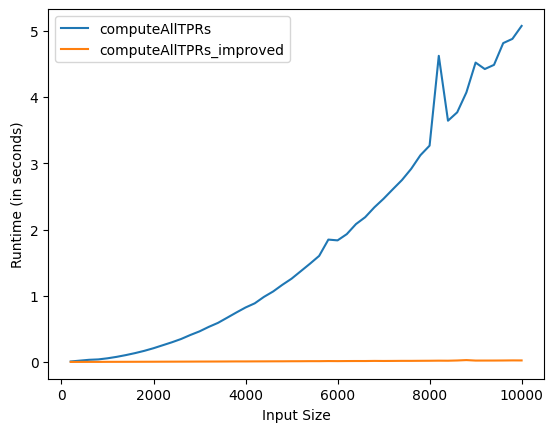

In [70]:
# O(n^2) > O(nlogn), so the improved algorithm should be more efficient.
import time
import pandas as pd
TPR_time = pd.DataFrame(columns=['i', 'time', 'improved_time'])

for i in range(2,101,2):
    numSamples = 100*i
    
    start1 = time.time()
    testComputeAllTPRs(numSamples)
    end1 = time.time()
    
    start2 = time.time()
    testComputeAllTPRs_improved(numSamples)
    end2 = time.time()
    TPR_time = TPR_time._append({'i': 100*i, 'time': end1 - start1, 'improved_time': end2 - start2}, ignore_index=True)
    
plt.plot(TPR_time.i, TPR_time.time, label='computeAllTPRs')
plt.plot(TPR_time.i, TPR_time.improved_time, label='computeAllTPRs_improved')
plt.legend()
plt.ylabel('Runtime (in seconds)')
plt.xlabel('Input Size')
plt.show() 